In [4]:
from toccsl_analysis import *

In [5]:
# Sets data path to the folder in which the analysis will take place
data_path = 'C:/Users/mrdxy/Documents/Analysis_Master_Thesis/TestData_2colorToccsl/simultaneous/{}'

In [ ]:
# The following cell can be used to find colocalizations

In [91]:
!python -m sdt.gui.locator

C:\Users\mrdxy\anaconda3\lib\runpy.py:127: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
C:\Users\mrdxy\anaconda3\lib\runpy.py:127: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
C:\Users\mrdxy\anaconda3\lib\runpy.py:127: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Exception ignored in: <function Pool.__del__ at 0x000001AF60112AF0>
Traceback (most recent call last):
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\pool.py", line 268, in __del__
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\queues.py", l

In [6]:
# Here the folder with the beads measurements is declared and the dimensions vect
beads_folder = data_path.format('beads')

In [ ]:
# This cell determines the dimensions of a single channel
spe_files = getfiles(extension='SPE', folder=beads_folder)

with pims.open(spe_files[0]) as seq:
    dimensions = (int(seq.frame_shape[1]/2), seq.frame_shape[0])

files:   0%|          | 0/32 [00:00<?, ?it/s]

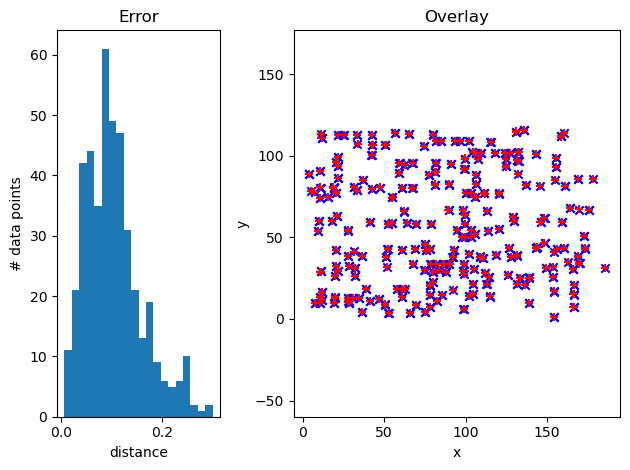

In [7]:
# Here the coordinate correction is performed
correction_registrator = coordinate_correction(beads_folder, dimensions)

In [8]:
# The analysis folder is declared and the important parameters set
analysis_folder = data_path.format('')

analysis_frame = 2
d_coloc = 0.3

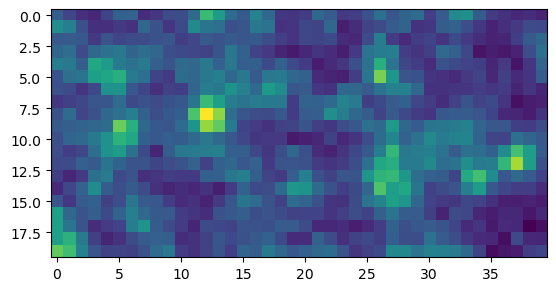

In [13]:
# This cell demonstrates how a certain ROI can be chosen
from matplotlib.pyplot import imshow

spe_files = getfiles(extension='SPE', folder=analysis_folder)

roi_1 = roi.ROI([0, 0], size=dimensions)
set_roi = roi.ROI([80, 50], [120, 70])

with pims.open(spe_files[0]) as seq:
    imshow(set_roi(roi_1(seq[0])))

In [14]:
# The colocalization analysis is done
dimer_fraction, p1 = colocalization_analysis(analysis_folder, analysis_frame, dimensions, correction_registrator, set_roi=set_roi, d_coloc=d_coloc)
print('Dimer fraction:', dimer_fraction)

files:   0%|          | 0/68 [00:00<?, ?it/s]

Dimer fraction: 0.019328675494895333
